# PM Homework 9

**FBA Quant 이의형**

---

## Assignment 1. Summarize Text Book

- [Quantitative Portfolio Mangement] Chap 7. The Conventional Theory if Performance Evaluation

### 7.1 Definition of a Risk Measure

$RM(·)$: random variable의 집합에 대한 연산자  

random variable $L$: 활동이 발생시킬 수 있는 손실  

$RM(L)$: 이 활동을 수행하고 잠재적 손실을 충분한 확률로 줄일 수 있는 것에 필요한 자본  

**Definition 7.1.1**  

$L$이 실수 값을 갖는 random variable의 공간이면, 임의의 연산자 $RM$: $L$ -> $R$은 $L$에 대한 risk measure라 한다.  

Convention: $L$이 양수이면 loss, $L$이 음수이면 gain  
- ex) $L = 10$ -> loss:10, $L = -10$ -> gain:10  

RM이 일반적으로 만족해야하는 4개의 feature -> 이러한 feature를 만족하는 RM: coherent
- Translation Invariance: 확정 손실 $x$에 대하여 $RM(L+x)=RM(L)+x$  
- Sub-additivity: $RM(L_1 + L_2) \le RM(L_1) + RM(L_2)$ (여러 사업을 하나의 사업으로 운영하는 것이 더 이득) 
- Positive Homogeneity: $RM(tL) = tRM(L) \quad(t > 0)$  
- Monotonicity: almost surely $RM(L_1) \ge RM(L_2) \quad (L_1 \ge L_2)$


### 7.2 Risk Measure in the Markowitz Framework

#### 7.2.1 The Markowitz Risk Measure

**Definition 7.2.1 (Loss function)**  

$L_{\pi} = -\pi'(R-r_01_d)$
- $-L_{\pi}$는 위험 배분 $\pi$의 self-financing portfolio 수익률 (혹은 investment portfolio의 초과수익률)  

**Definition 7.2.2 (Markowitz Risk Measure)**  

$RM_\lambda (L_\pi) = -E(L_\pi) + \lambda + \sigma (L_\pi)$  
- $RL_\lambda (\pi) = RM_\lambda (\pi)$

**Definition 7.2.3 (Positive Definiteness and Parameter Range)**  

필요충분조건 $\forall \pi \in R \; \text{\\} {0}, RL_\lambda (\pi) > 0$를 만족할 때, $RM_\lambda (·)$는 positive definite하다고 한다.


#### 7.2.2 Value at Risk

$\Phi$: 정규 변수 $Z ~ N(0,1)$에 대한 누적 분포 함수  
$\phi$: $\Phi$의 미분 (밀도 함수)  

**Definition 7.2.4 (Value at Risk)**  

$VaR_\alpha(L_\pi) = \text {inf}[{x \in R, P(L_\pi \le x) \ge \alpha}], \quad (\alpha \in ]0,1[)$

#### 7.2.3 Expected Shortfall

**Definition 7.2.5 (Expected Shortfall)**

$E_\alpha(L_\pi) = E(L_\pi|L_\pi \ge VaR_\alpha(L_\pi)), \quad (\alpha \in ]0,1[)$

### 7.3 Euler’s Formula and Capital Allocation

$\pi \in R^d$에 대하여, $\pi = \displaystyle \sum^d_{i=1} \pi_ie_i$  

$\forall \pi \in R^d, RL_\lambda(\pi) \le \displaystyle \sum^d_{i=1} RL_\lambda(\pi^ie_i)$ (diversification effect) 

$\forall \pi \in R^d, RL_\lambda(\pi) \le \displaystyle \sum^d_{i=1} \pi^i \frac {\partial RL_\lambda} {\partial e_i} (\pi)$ (Euler's formula) 

---

## Example

[*********************100%***********************]  5 of 5 completed
[-0.07129927 -0.06948054]
The Var 99% is: -0.06948053644008555


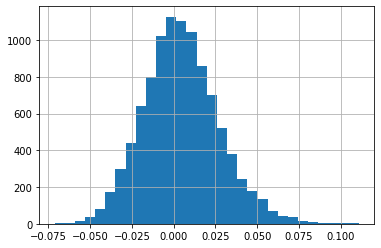

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['DHL.DE' ,'ALV.DE' ,'BMW.DE' ,'BAS.DE' ,'FME.DE'] 
start ='2017-01-01'
end ='2017-12-31'

R = yf.download(tickers, start, end)['Close'].pct_change()[1:]

# BHS VaR calculation for the portfolio
d = len(tickers)
p = 10 # number of daily returns considered in each bootstrap simulation
s = 10000 # number of bootstrap simulations
w = np.zeros(d) # defines the shape of the vector of allocation
w = np.full(d, 1.0/d) # arbitrary choice of constant weights for the portfolio in this example
n = len(R.index) # number of vector of returns from the sample

perf = np.zeros(s)
for  i in range(s):
    idx = np.random.choice(n,p) # select with replacement p vectors of returns amongst n
    RB = R.iloc[idx]
    RBP = np.prod(1+RB)-1 # calculate culmulative returns over p days for each stock
    perf[i] = RBP.dot(w) # calculate the portfolio return over p days

print (np.percentile(perf, [0, 0.01]))
print ("The Var 99% is:", np.percentile(perf , [0, 0.01])[1])

plt.hist(perf, 30) # histogram for the portfolio return with 30 buckets
plt.grid(True)
plt.show()

---